In [12]:
import arc
import numpy as np
from matplotlib import pyplot as plt

In [13]:
n_na_start = 40
n_na_end = 70
dn = 0

num_n = n_na_end - n_na_start + 1

In [14]:
def get_energy(atom, n, l, j, B):
    eVToGHz = 2.417989242 * 1e14 / 1e9
    JToGHz = 1.509190179 * 1e33 / 1e9
    E = atom.getEnergy(n, l, j) * eVToGHz
    ZeemanE = atom.getZeemanEnergyShift(l, j, 0.5, B * 1e-4) * JToGHz
    return E + ZeemanE

In [15]:
# Find p state energies relative to s states of Na and Cs
Na = arc.Sodium()
Cs = arc.Cesium()

NaS = np.zeros(num_n)
CsS = np.zeros(num_n)
NaP1 = np.zeros(num_n + 1) # start from n_na_start - 1, P1/2
NaP2 = np.zeros(num_n + 1) # start from n_na_start - 1, P3/2
CsP1 = np.zeros(num_n + 1) # start from n_na_start + dn - 1, P1/2 
CsP2 = np.zeros(num_n + 1) # start from n_na_start + dn - 1, P3/2 

# Do the first one
n_na = n_na_start - 1
n_cs = n_na_start + dn - 1
NaP1[0] = get_energy(Na, n_na, 1, 0.5, 8.8)
NaP2[0] = get_energy(Na, n_na, 1, 1.5, 8.8)
CsP1[0] = get_energy(Cs, n_cs, 1, 0.5, 8.8)
CsP2[0] = get_energy(Cs, n_cs, 1, 1.5, 8.8)

for i in range(num_n):
    n_na = n_na_start + i
    n_cs = n_na_start + i + dn
    NaS[i] = get_energy(Na, n_na, 0, 0.5, 8.8)
    CsS[i] = get_energy(Cs, n_cs, 0, 0.5, 8.8)
    NaP1[i + 1] = get_energy(Na, n_na, 1, 0.5, 8.8)
    NaP2[i + 1] = get_energy(Na, n_na, 1, 1.5, 8.8)
    CsP1[i + 1] = get_energy(Cs, n_cs, 1, 0.5, 8.8)
    CsP2[i + 1] = get_energy(Cs, n_cs, 1, 1.5, 8.8)
    

In [16]:
# derived quantities
Nap01 = NaS - NaP1[1:num_n + 1]
Nap02 = NaS - NaP2[1:num_n + 1]
Napm11 = NaS - NaP1[0:num_n]
Napm12 = NaS - NaP2[0:num_n]
Csp01 = CsS - CsP1[1:num_n + 1]
Csp02 = CsS - CsP2[1:num_n + 1]
Cspm11 = CsS - CsP1[0:num_n]
Cspm12 = CsS - CsP2[0:num_n]


Text(0.5, 1.0, 'dn = 0')

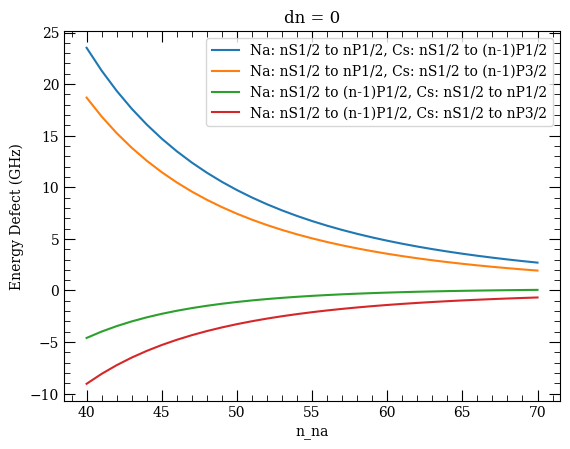

In [23]:
# plot some combinations. First Na preserves p, Cs goes down in p
n_nas = np.linspace(n_na_start, n_na_end, num_n)
plt.plot(n_nas, Nap01 + Cspm11, label = 'Na: nS1/2 to nP1/2, Cs: nS1/2 to (n-1)P1/2')
plt.plot(n_nas, Nap01 + Cspm12, label = 'Na: nS1/2 to nP1/2, Cs: nS1/2 to (n-1)P3/2')
plt.plot(n_nas, Napm11 + Csp01, label = 'Na: nS1/2 to (n-1)P1/2, Cs: nS1/2 to nP1/2')
plt.plot(n_nas, Napm11 + Csp02, label = 'Na: nS1/2 to (n-1)P1/2, Cs: nS1/2 to nP3/2')
plt.legend()
plt.xlabel('n_na')
plt.ylabel('Energy Defect (GHz)')
plt.title('Interspecies interaction: dn = 0')

Text(0.5, 1.0, 'Na Intraspecies interaction: dn = 0')

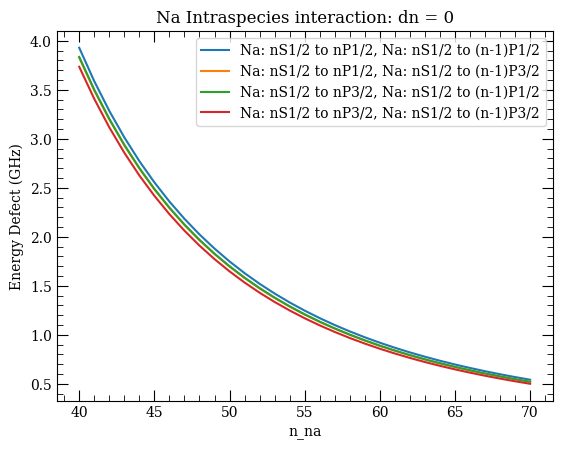

In [25]:
# plot some combinations. Intraspecies Na
n_nas = np.linspace(n_na_start, n_na_end, num_n)
plt.plot(n_nas, Nap01 + Napm11, label = 'Na: nS1/2 to nP1/2, Na: nS1/2 to (n-1)P1/2')
plt.plot(n_nas, Nap01 + Napm12, label = 'Na: nS1/2 to nP1/2, Na: nS1/2 to (n-1)P3/2')
plt.plot(n_nas, Nap02 + Napm11, label = 'Na: nS1/2 to nP3/2, Na: nS1/2 to (n-1)P1/2')
plt.plot(n_nas, Nap02 + Napm12, label = 'Na: nS1/2 to nP3/2, Na: nS1/2 to (n-1)P3/2')
plt.legend()
plt.xlabel('n_na')
plt.ylabel('Energy Defect (GHz)')
plt.title('Na Intraspecies interaction: dn = 0')

Text(0.5, 1.0, 'Cs Intraspecies interaction: dn = 0')

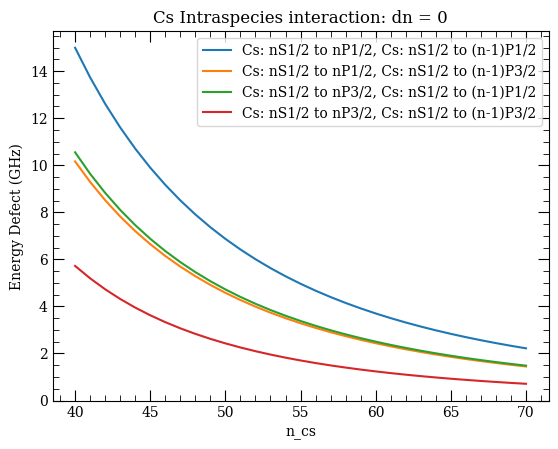

In [26]:
# plot some combinations. Intraspecies Cs
n_nas = np.linspace(n_na_start, n_na_end, num_n)
plt.plot(n_nas, Csp01 + Cspm11, label = 'Cs: nS1/2 to nP1/2, Cs: nS1/2 to (n-1)P1/2')
plt.plot(n_nas, Csp01 + Cspm12, label = 'Cs: nS1/2 to nP1/2, Cs: nS1/2 to (n-1)P3/2')
plt.plot(n_nas, Csp02 + Cspm11, label = 'Cs: nS1/2 to nP3/2, Cs: nS1/2 to (n-1)P1/2')
plt.plot(n_nas, Csp02 + Cspm12, label = 'Cs: nS1/2 to nP3/2, Cs: nS1/2 to (n-1)P3/2')
plt.legend()
plt.xlabel('n_cs')
plt.ylabel('Energy Defect (GHz)')
plt.title('Cs Intraspecies interaction: dn = 0')

# Now, as a function of dn

In [27]:
n_na_start = 40
n_na_end = 70
dn = 4

num_n = n_na_end - n_na_start + 1

In [28]:
# Find p state energies relative to s states of Na and Cs
Na = arc.Sodium()
Cs = arc.Cesium()

NaS = np.zeros(num_n)
CsS = np.zeros(num_n)
NaP1 = np.zeros(num_n + 1) # start from n_na_start - 1, P1/2
NaP2 = np.zeros(num_n + 1) # start from n_na_start - 1, P3/2
CsP1 = np.zeros(num_n + 1) # start from n_na_start + dn - 1, P1/2 
CsP2 = np.zeros(num_n + 1) # start from n_na_start + dn - 1, P3/2 

# Do the first one
n_na = n_na_start - 1
n_cs = n_na_start + dn - 1
NaP1[0] = get_energy(Na, n_na, 1, 0.5, 8.8)
NaP2[0] = get_energy(Na, n_na, 1, 1.5, 8.8)
CsP1[0] = get_energy(Cs, n_cs, 1, 0.5, 8.8)
CsP2[0] = get_energy(Cs, n_cs, 1, 1.5, 8.8)

for i in range(num_n):
    n_na = n_na_start + i
    n_cs = n_na_start + i + dn
    NaS[i] = get_energy(Na, n_na, 0, 0.5, 8.8)
    CsS[i] = get_energy(Cs, n_cs, 0, 0.5, 8.8)
    NaP1[i + 1] = get_energy(Na, n_na, 1, 0.5, 8.8)
    NaP2[i + 1] = get_energy(Na, n_na, 1, 1.5, 8.8)
    CsP1[i + 1] = get_energy(Cs, n_cs, 1, 0.5, 8.8)
    CsP2[i + 1] = get_energy(Cs, n_cs, 1, 1.5, 8.8)
    

In [29]:
# derived quantities
Nap01 = NaS - NaP1[1:num_n + 1]
Nap02 = NaS - NaP2[1:num_n + 1]
Napm11 = NaS - NaP1[0:num_n]
Napm12 = NaS - NaP2[0:num_n]
Csp01 = CsS - CsP1[1:num_n + 1]
Csp02 = CsS - CsP2[1:num_n + 1]
Cspm11 = CsS - CsP1[0:num_n]
Cspm12 = CsS - CsP2[0:num_n]

Text(0.5, 1.0, 'Interspecies interaction: dn = 4')

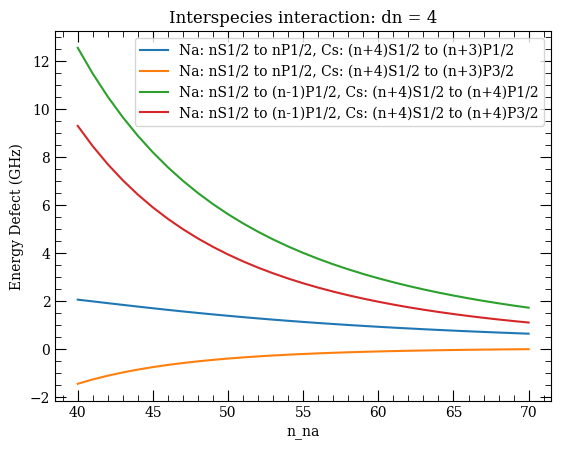

In [31]:
# plot some combinations. First Na preserves p, Cs goes down in p
n_nas = np.linspace(n_na_start, n_na_end, num_n)
plt.plot(n_nas, Nap01 + Cspm11, label = 'Na: nS1/2 to nP1/2, Cs: (n+4)S1/2 to (n+3)P1/2')
plt.plot(n_nas, Nap01 + Cspm12, label = 'Na: nS1/2 to nP1/2, Cs: (n+4)S1/2 to (n+3)P3/2')
plt.plot(n_nas, Napm11 + Csp01, label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+4)S1/2 to (n+4)P1/2')
plt.plot(n_nas, Napm11 + Csp02, label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+4)S1/2 to (n+4)P3/2')
plt.legend()
plt.xlabel('n_na')
plt.ylabel('Energy Defect (GHz)')
plt.title('Interspecies interaction: dn = 4')

Text(0.5, 1.0, 'Interspecies interaction: dn = 4')

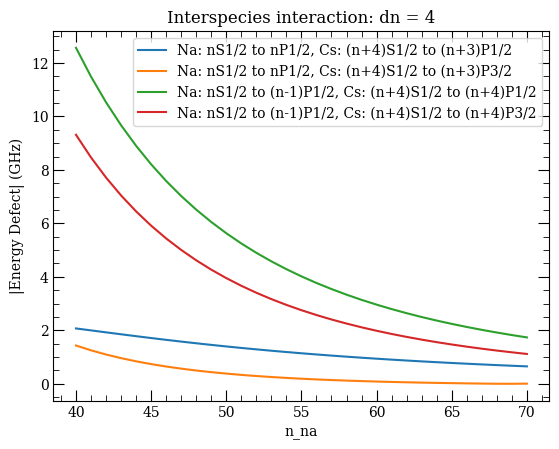

In [32]:
# plot some combinations. First Na preserves p, Cs goes down in p
n_nas = np.linspace(n_na_start, n_na_end, num_n)
plt.plot(n_nas, np.abs(Nap01 + Cspm11), label = 'Na: nS1/2 to nP1/2, Cs: (n+4)S1/2 to (n+3)P1/2')
plt.plot(n_nas, np.abs(Nap01 + Cspm12), label = 'Na: nS1/2 to nP1/2, Cs: (n+4)S1/2 to (n+3)P3/2')
plt.plot(n_nas, np.abs(Napm11 + Csp01), label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+4)S1/2 to (n+4)P1/2')
plt.plot(n_nas, np.abs(Napm11 + Csp02), label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+4)S1/2 to (n+4)P3/2')
plt.legend()
plt.xlabel('n_na')
plt.ylabel('|Energy Defect| (GHz)')
plt.title('Interspecies interaction: dn = 4')

Text(0.5, 1.0, 'Interspecies interaction: dn = 4')

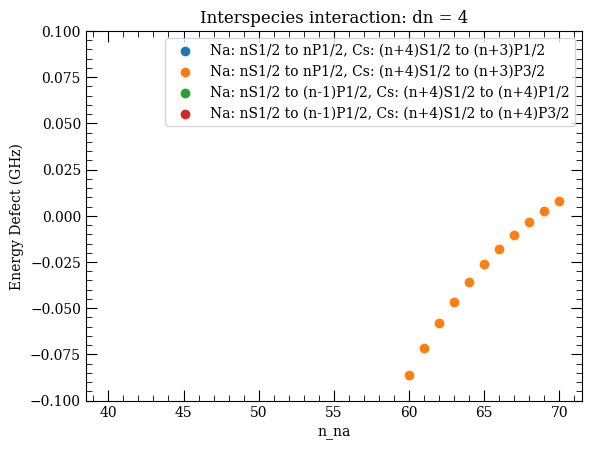

In [35]:
# zoom in
# plot some combinations. First Na preserves p, Cs goes down in p
n_nas = np.linspace(n_na_start, n_na_end, num_n)
plt.scatter(n_nas, Nap01 + Cspm11, label = 'Na: nS1/2 to nP1/2, Cs: (n+4)S1/2 to (n+3)P1/2')
plt.scatter(n_nas, Nap01 + Cspm12, label = 'Na: nS1/2 to nP1/2, Cs: (n+4)S1/2 to (n+3)P3/2')
plt.scatter(n_nas, Napm11 + Csp01, label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+4)S1/2 to (n+4)P1/2')
plt.scatter(n_nas, Napm11 + Csp02, label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+4)S1/2 to (n+4)P3/2')
plt.legend()
plt.xlabel('n_na')
plt.ylabel('Energy Defect (GHz)')
plt.ylim([-0.1,0.1])
plt.title('Interspecies interaction: dn = 4')

# dn = 3

In [45]:
n_na_start = 40
n_na_end = 70
dn = 3

num_n = n_na_end - n_na_start + 1

In [46]:
# Find p state energies relative to s states of Na and Cs
Na = arc.Sodium()
Cs = arc.Cesium()

NaS = np.zeros(num_n)
CsS = np.zeros(num_n)
NaP1 = np.zeros(num_n + 1) # start from n_na_start - 1, P1/2
NaP2 = np.zeros(num_n + 1) # start from n_na_start - 1, P3/2
CsP1 = np.zeros(num_n + 1) # start from n_na_start + dn - 1, P1/2 
CsP2 = np.zeros(num_n + 1) # start from n_na_start + dn - 1, P3/2 

# Do the first one
n_na = n_na_start - 1
n_cs = n_na_start + dn - 1
NaP1[0] = get_energy(Na, n_na, 1, 0.5, 8.8)
NaP2[0] = get_energy(Na, n_na, 1, 1.5, 8.8)
CsP1[0] = get_energy(Cs, n_cs, 1, 0.5, 8.8)
CsP2[0] = get_energy(Cs, n_cs, 1, 1.5, 8.8)

for i in range(num_n):
    n_na = n_na_start + i
    n_cs = n_na_start + i + dn
    NaS[i] = get_energy(Na, n_na, 0, 0.5, 8.8)
    CsS[i] = get_energy(Cs, n_cs, 0, 0.5, 8.8)
    NaP1[i + 1] = get_energy(Na, n_na, 1, 0.5, 8.8)
    NaP2[i + 1] = get_energy(Na, n_na, 1, 1.5, 8.8)
    CsP1[i + 1] = get_energy(Cs, n_cs, 1, 0.5, 8.8)
    CsP2[i + 1] = get_energy(Cs, n_cs, 1, 1.5, 8.8)

In [47]:
# derived quantities
Nap01 = NaS - NaP1[1:num_n + 1]
Nap02 = NaS - NaP2[1:num_n + 1]
Napm11 = NaS - NaP1[0:num_n]
Napm12 = NaS - NaP2[0:num_n]
Csp01 = CsS - CsP1[1:num_n + 1]
Csp02 = CsS - CsP2[1:num_n + 1]
Cspm11 = CsS - CsP1[0:num_n]
Cspm12 = CsS - CsP2[0:num_n]

Text(0.5, 1.0, 'Interspecies interaction: dn = 3')

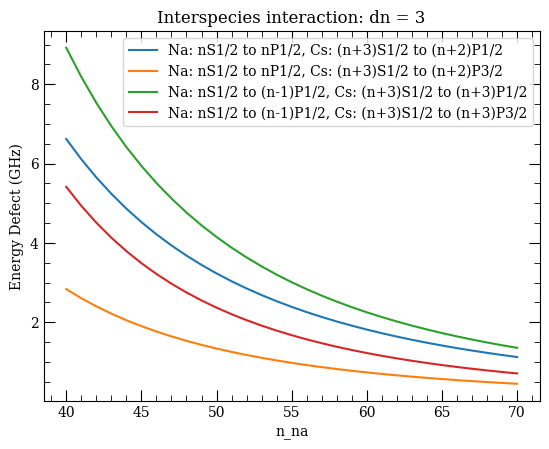

In [48]:
# plot some combinations. First Na preserves p, Cs goes down in p
n_nas = np.linspace(n_na_start, n_na_end, num_n)
plt.plot(n_nas, Nap01 + Cspm11, label = 'Na: nS1/2 to nP1/2, Cs: (n+3)S1/2 to (n+2)P1/2')
plt.plot(n_nas, Nap01 + Cspm12, label = 'Na: nS1/2 to nP1/2, Cs: (n+3)S1/2 to (n+2)P3/2')
plt.plot(n_nas, Napm11 + Csp01, label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+3)S1/2 to (n+3)P1/2')
plt.plot(n_nas, Napm11 + Csp02, label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+3)S1/2 to (n+3)P3/2')
plt.legend()
plt.xlabel('n_na')
plt.ylabel('Energy Defect (GHz)')
plt.title('Interspecies interaction: dn = 3')

# dn = 1

In [95]:
n_na_start = 40
n_na_end = 70
dn = -1

num_n = n_na_end - n_na_start + 1

In [96]:
# Find p state energies relative to s states of Na and Cs
Na = arc.Sodium()
Cs = arc.Cesium()

NaS = np.zeros(num_n)
CsS = np.zeros(num_n)
NaP1 = np.zeros(num_n + 1) # start from n_na_start - 1, P1/2
NaP2 = np.zeros(num_n + 1) # start from n_na_start - 1, P3/2
CsP1 = np.zeros(num_n + 1) # start from n_na_start + dn - 1, P1/2 
CsP2 = np.zeros(num_n + 1) # start from n_na_start + dn - 1, P3/2 

# Do the first one
n_na = n_na_start - 1
n_cs = n_na_start + dn - 1
NaP1[0] = get_energy(Na, n_na, 1, 0.5, 8.8)
NaP2[0] = get_energy(Na, n_na, 1, 1.5, 8.8)
CsP1[0] = get_energy(Cs, n_cs, 1, 0.5, 8.8)
CsP2[0] = get_energy(Cs, n_cs, 1, 1.5, 8.8)

for i in range(num_n):
    n_na = n_na_start + i
    n_cs = n_na_start + i + dn
    NaS[i] = get_energy(Na, n_na, 0, 0.5, 8.8)
    CsS[i] = get_energy(Cs, n_cs, 0, 0.5, 8.8)
    NaP1[i + 1] = get_energy(Na, n_na, 1, 0.5, 8.8)
    NaP2[i + 1] = get_energy(Na, n_na, 1, 1.5, 8.8)
    CsP1[i + 1] = get_energy(Cs, n_cs, 1, 0.5, 8.8)
    CsP2[i + 1] = get_energy(Cs, n_cs, 1, 1.5, 8.8)

In [97]:
# derived quantities
Nap01 = NaS - NaP1[1:num_n + 1]
Nap02 = NaS - NaP2[1:num_n + 1]
Napm11 = NaS - NaP1[0:num_n]
Napm12 = NaS - NaP2[0:num_n]
Csp01 = CsS - CsP1[1:num_n + 1]
Csp02 = CsS - CsP2[1:num_n + 1]
Cspm11 = CsS - CsP1[0:num_n]
Cspm12 = CsS - CsP2[0:num_n]

Text(0.5, 1.0, 'Interspecies interaction: dn = -1')

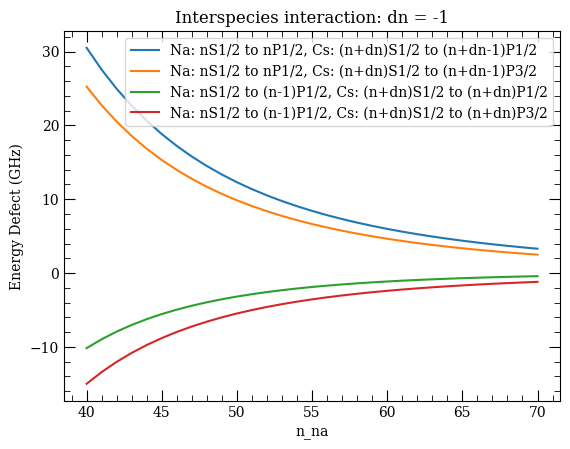

In [99]:
# plot some combinations. First Na preserves p, Cs goes down in p
n_nas = np.linspace(n_na_start, n_na_end, num_n)
plt.plot(n_nas, Nap01 + Cspm11, label = 'Na: nS1/2 to nP1/2, Cs: (n+dn)S1/2 to (n+dn-1)P1/2')
plt.plot(n_nas, Nap01 + Cspm12, label = 'Na: nS1/2 to nP1/2, Cs: (n+dn)S1/2 to (n+dn-1)P3/2')
plt.plot(n_nas, Napm11 + Csp01, label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+dn)S1/2 to (n+dn)P1/2')
plt.plot(n_nas, Napm11 + Csp02, label = 'Na: nS1/2 to (n-1)P1/2, Cs: (n+dn)S1/2 to (n+dn)P3/2')
plt.legend()
plt.xlabel('n_na')
plt.ylabel('Energy Defect (GHz)')
plt.title('Interspecies interaction: dn = -1')